## **Importing Libraries**

In [268]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance

## **Visualization of training CSV**

In [269]:
df_train = pd.read_csv('train.csv')
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## **Visualization of testing CSV**

In [270]:
df_test = pd.read_csv('test.csv')
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


### Information of training csv

In [271]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [272]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Checking NaN values per colummn

In [273]:
df_train.isnull().sum().to_csv('missing_values_report.csv')

## 📊 **Exploration of Data**

In this exploratory data analysis (EDA), I will begin by creating a heatmap to easily identify which numerical features have a strong positive correlation with the target variable, `SalePrice`. 

Following this, I will generate **boxplots** and **histograms** for the selected features to **detect potential outliers** and **better understand their distributions**.

This approach allows for a focused and efficient analysis, guiding the subsequent steps in data cleaning and modeling.


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


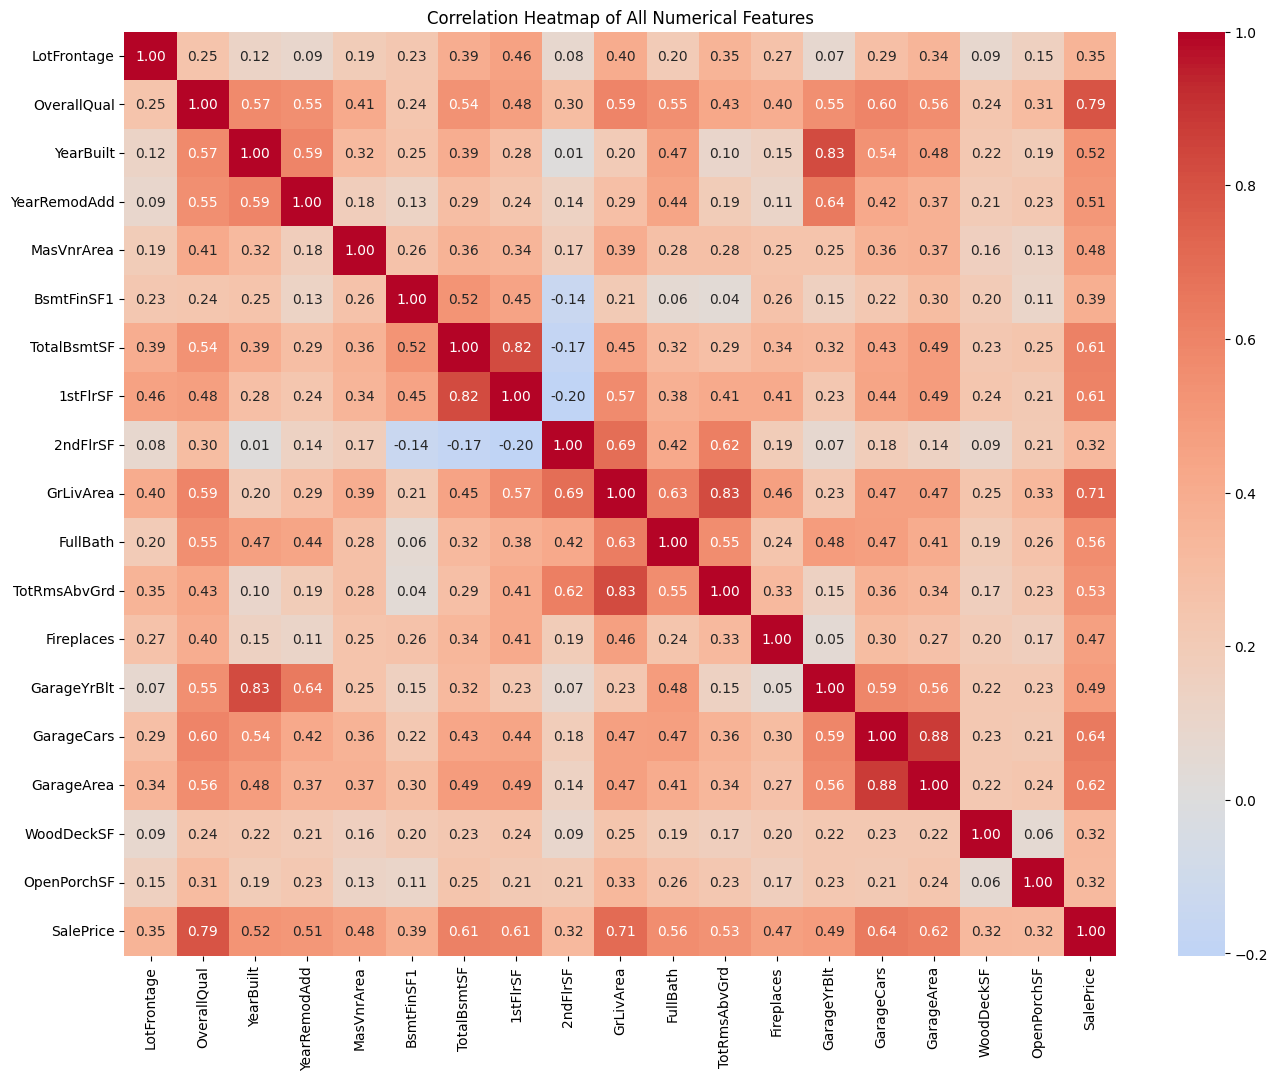

In [274]:
# Due to a high ammount of numerical feature, this heatmap will only contain the ones that have a direct correlation with Sales Price

cols = df_train.select_dtypes(include=['int64', 'float64']).columns
print(cols)

corr = df_train[cols].corr()

relevant_features = corr['SalePrice'][abs(corr['SalePrice']) > 0.3].index
filtered_corr_matrix = df_train[relevant_features].corr()

plt.figure(figsize=(16, 12))  
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of All Numerical Features")
plt.show()


## **Cleaning Testing Dataset for testing**

In [275]:
# separate numerical features from categorical features (imputation - filling missing values)

num_feat = df_test.select_dtypes(include=['int64', 'float64']).columns
categ_feat = df_test.select_dtypes(include=['object']).columns

df_simple_imput_test = df_test.copy()
df_knn_imput_test = df_test.copy()

# simple imput 
for col in num_feat:
    df_simple_imput_test[col].fillna(df_simple_imput_test[col].median(), inplace=True)
for col in categ_feat:
    na_ratio = df_simple_imput_test[col].isna().mean()
    if na_ratio > 0.3:
        df_simple_imput_test[col].fillna('Unknown', inplace=True)
    else:
        df_simple_imput_test[col].fillna(df_simple_imput_test[col].mode()[0], inplace=True)

df_simple_imput_test.to_csv('test_with_simple.csv')


# knn input

for col in categ_feat:
    na_ratio = df_knn_imput_test[col].isna().mean()
    if na_ratio > 0.3:
        df_knn_imput_test[col].fillna('Unknown', inplace=True)
    else:
        df_knn_imput_test[col].fillna(df_knn_imput_test[col].mode()[0], inplace=True)

scaler = StandardScaler() # normalize data, mean->0 and std->1
num_scaled = scaler.fit_transform(df_knn_imput_test[num_feat]) # apply transformation

knn_imputer = KNNImputer(n_neighbors=5) # apply knn to 5 neighbors
num_imputed_scaled = knn_imputer.fit_transform(num_scaled) 

num_imputed = scaler.inverse_transform(num_imputed_scaled) # returns the normalized data into its original scale

df_knn_imput_test[num_feat] = num_imputed

df_knn_imput_test.to_csv('test_with_knn.csv')

## **Cleaning Training Dataset for plots**

In [276]:
# separate numerical features from categorical features (imputation - filling missing values)

num_feat = df_train.select_dtypes(include=['int64', 'float64']).columns
categ_feat = df_train.select_dtypes(include=['object']).columns

df_simple_imput = df_train.copy()
df_knn_imput = df_train.copy()

# simple imput 
for col in num_feat:
    df_simple_imput[col].fillna(df_simple_imput[col].median(), inplace=True)
for col in categ_feat:
    na_ratio = df_simple_imput[col].isna().mean()
    if na_ratio > 0.3:
        df_simple_imput[col].fillna('Unknown', inplace=True)
    else:
        df_simple_imput[col].fillna(df_simple_imput[col].mode()[0], inplace=True)

df_simple_imput.to_csv('train_with_simple.csv')


# knn input

for col in categ_feat:
    na_ratio = df_knn_imput[col].isna().mean()
    if na_ratio > 0.3:
        df_knn_imput[col].fillna('Unknown', inplace=True)
    else:
        df_knn_imput[col].fillna(df_knn_imput[col].mode()[0], inplace=True)

scaler = StandardScaler() # normalize data, mean->0 and std->1
num_scaled = scaler.fit_transform(df_knn_imput[num_feat]) # apply transformation

knn_imputer = KNNImputer(n_neighbors=5) # apply knn to 5 neighbors
num_imputed_scaled = knn_imputer.fit_transform(num_scaled) 

num_imputed = scaler.inverse_transform(num_imputed_scaled) # returns the normalized data into its original scale

df_knn_imput[num_feat] = num_imputed

df_knn_imput.to_csv('train_with_knn.csv')

## **Analyze distributions, outliers...**

==== Gráficos para: Simple Imputation ====


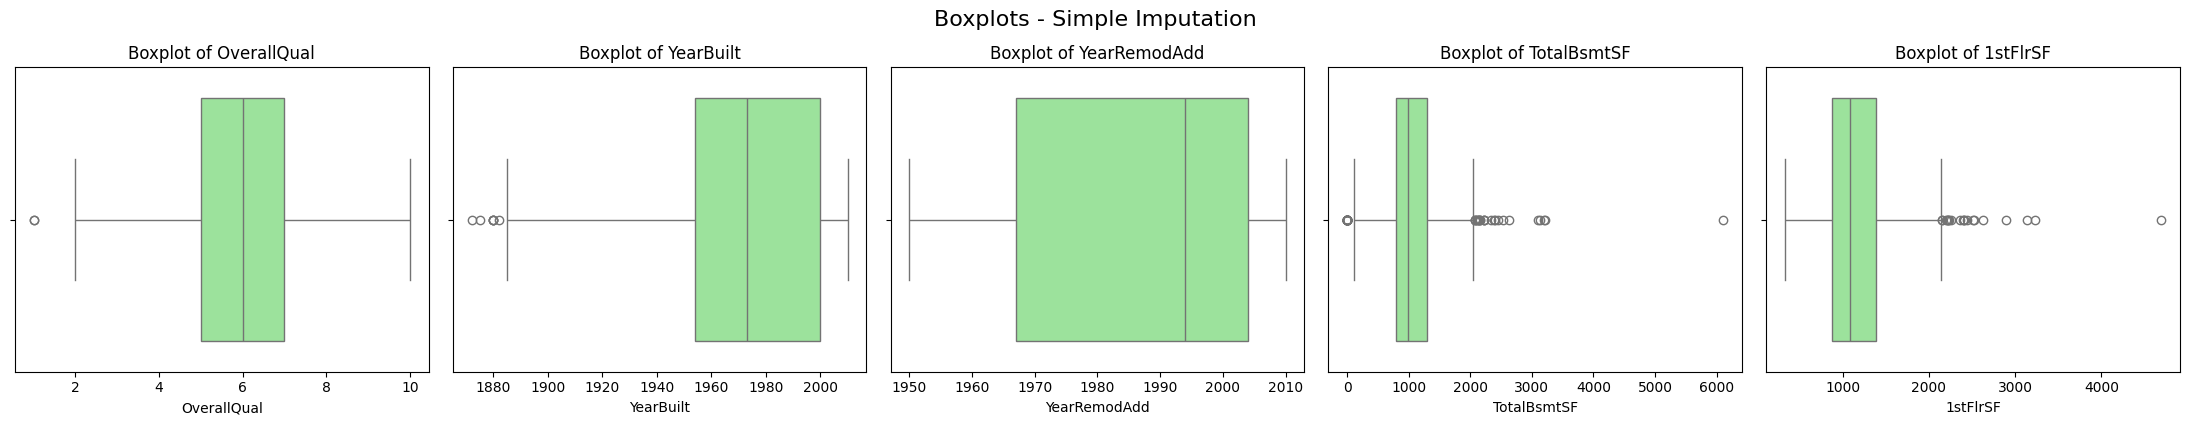

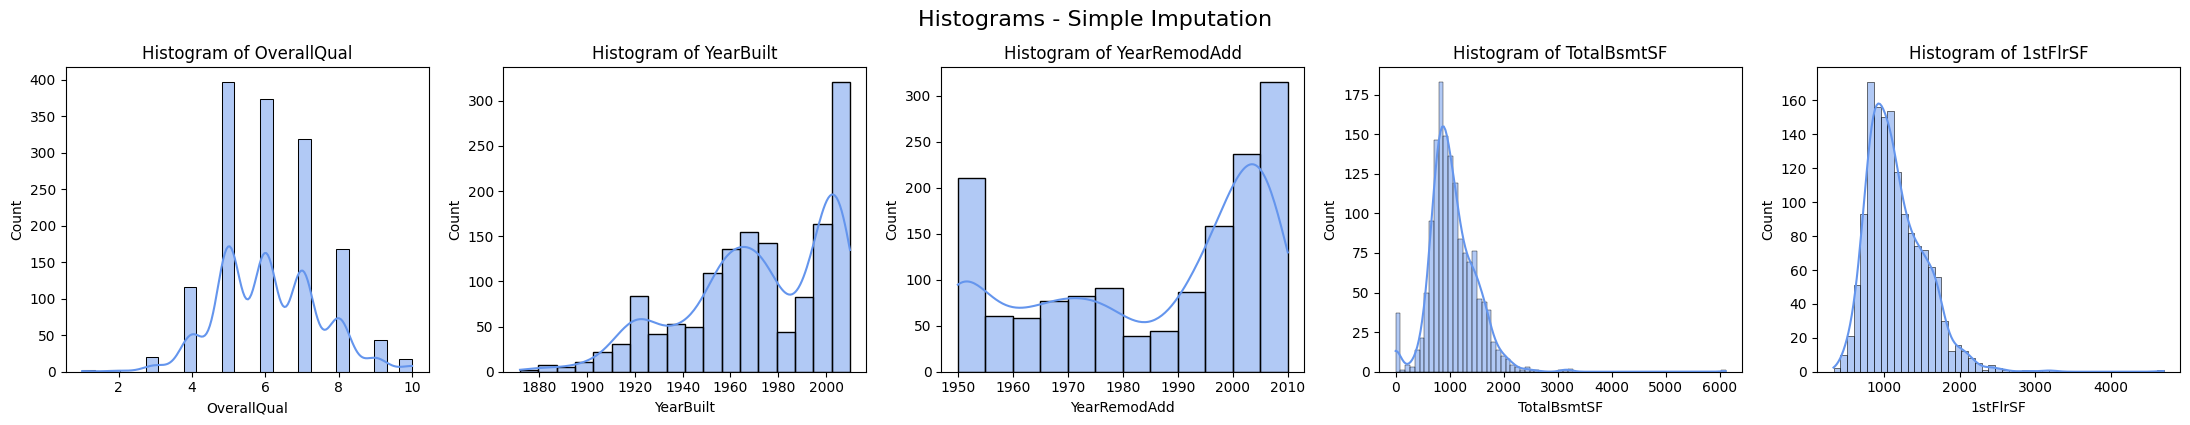

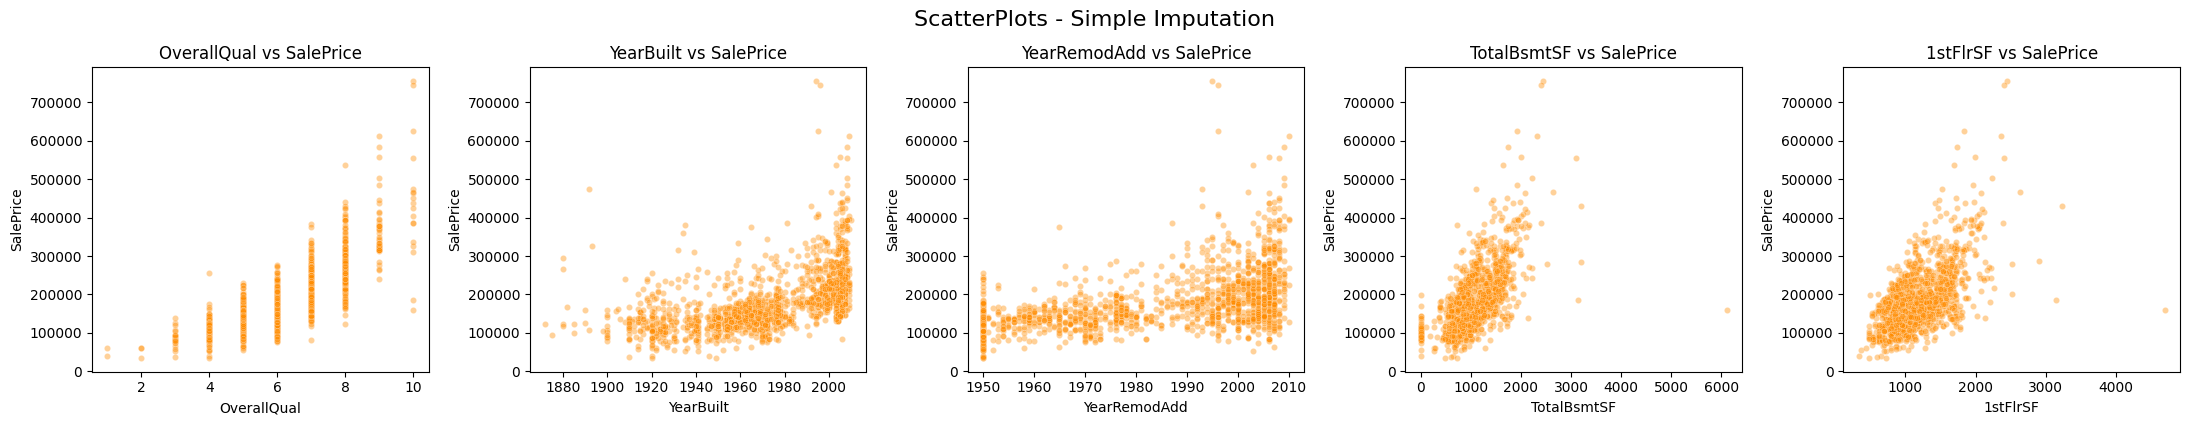

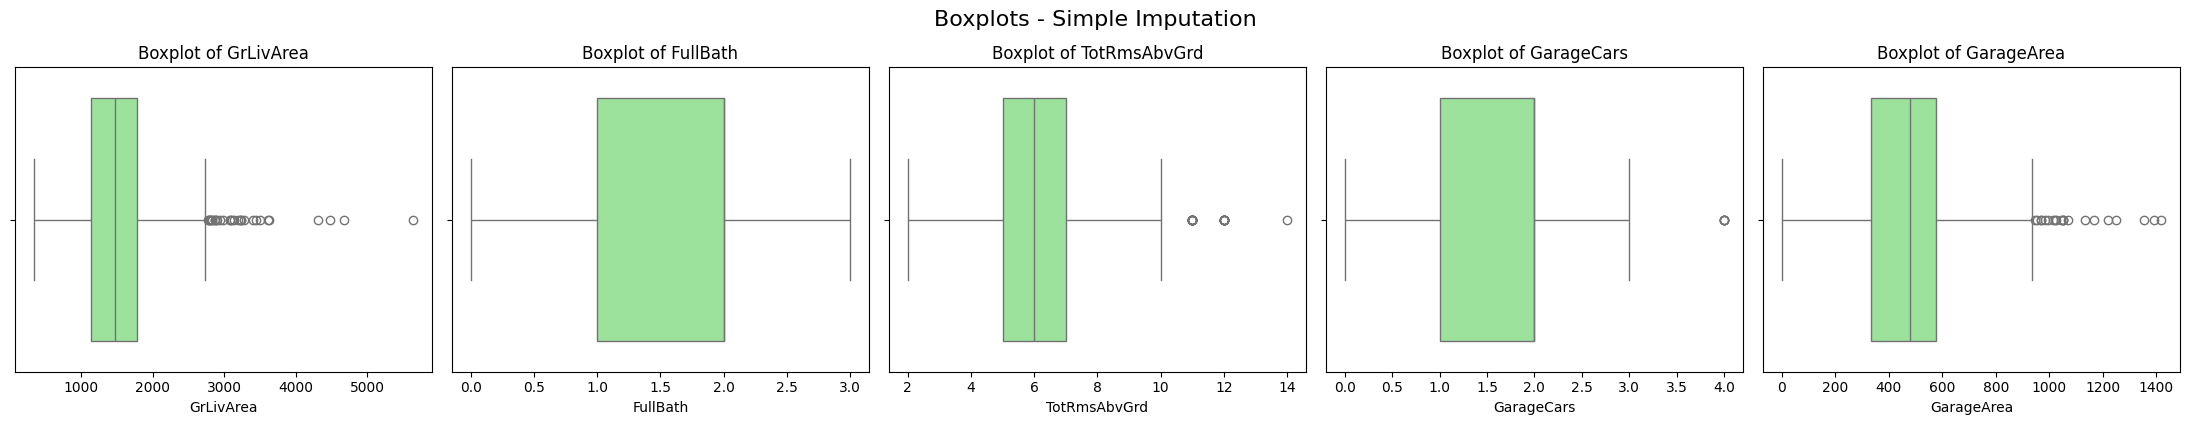

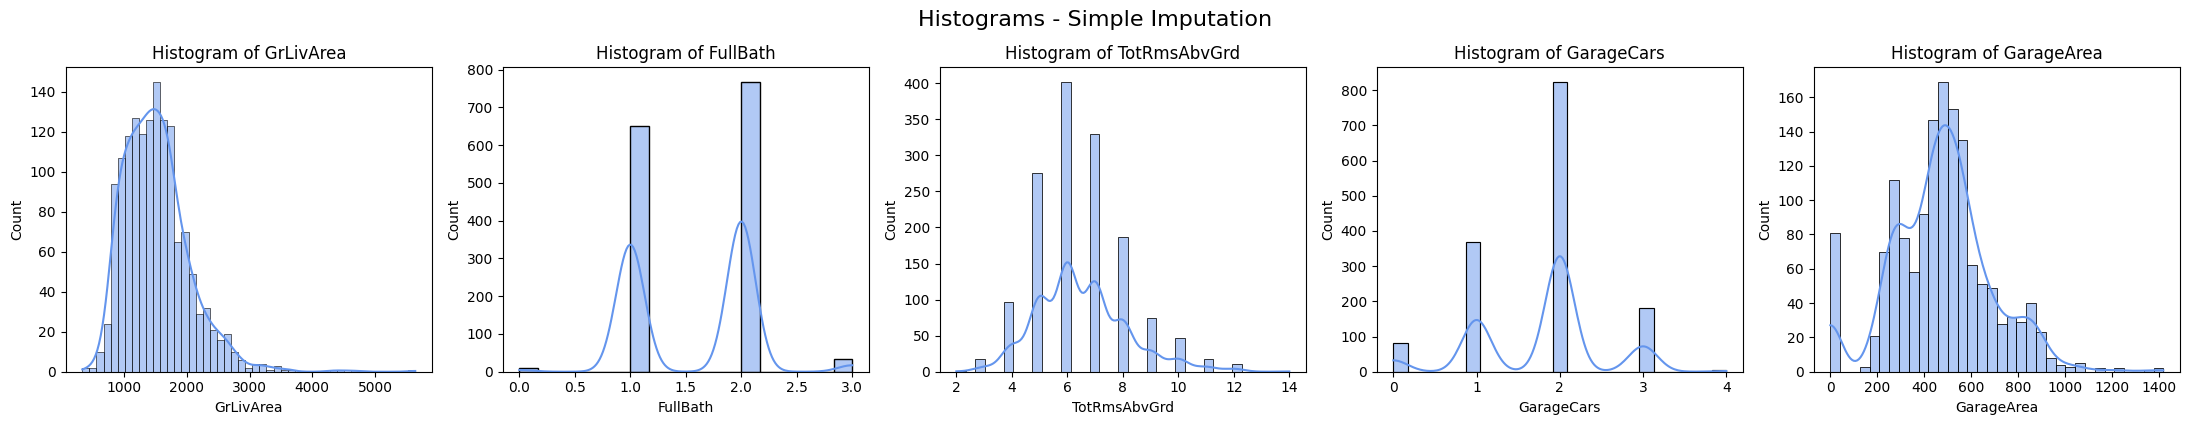

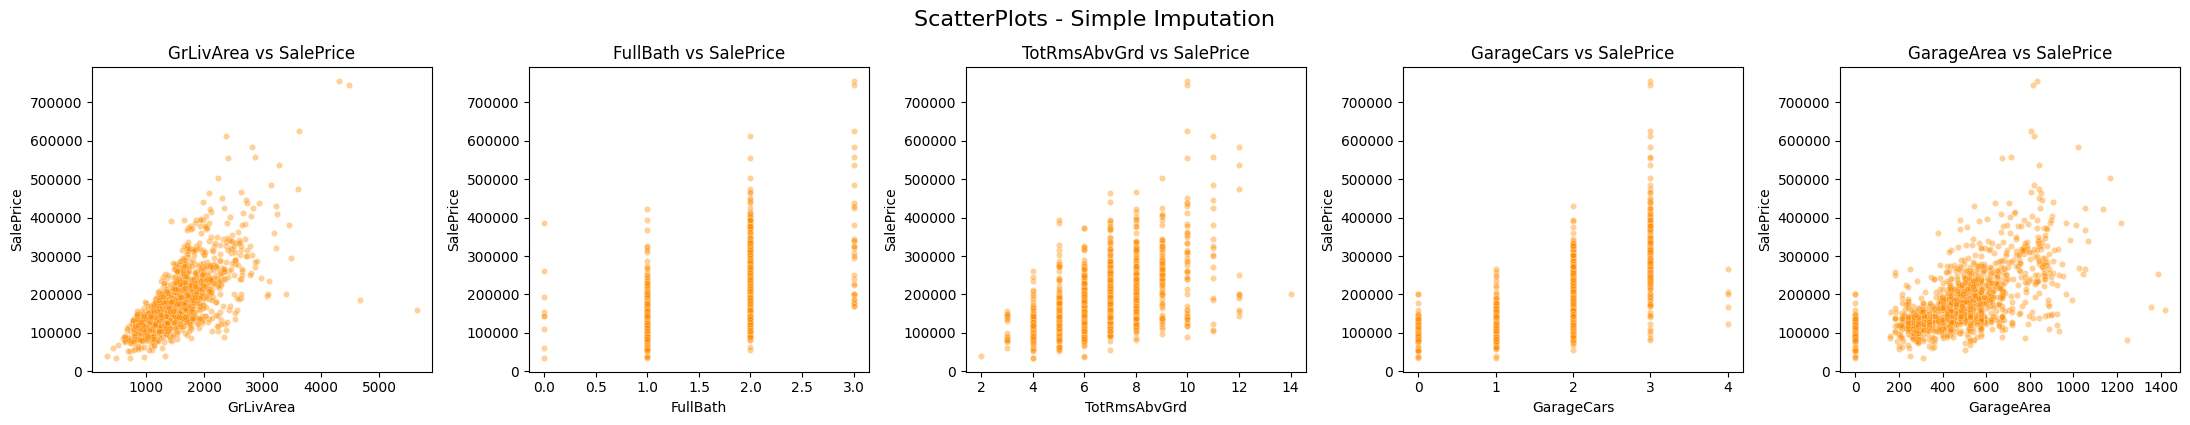

==== Gráficos para: KNN Imputation ====


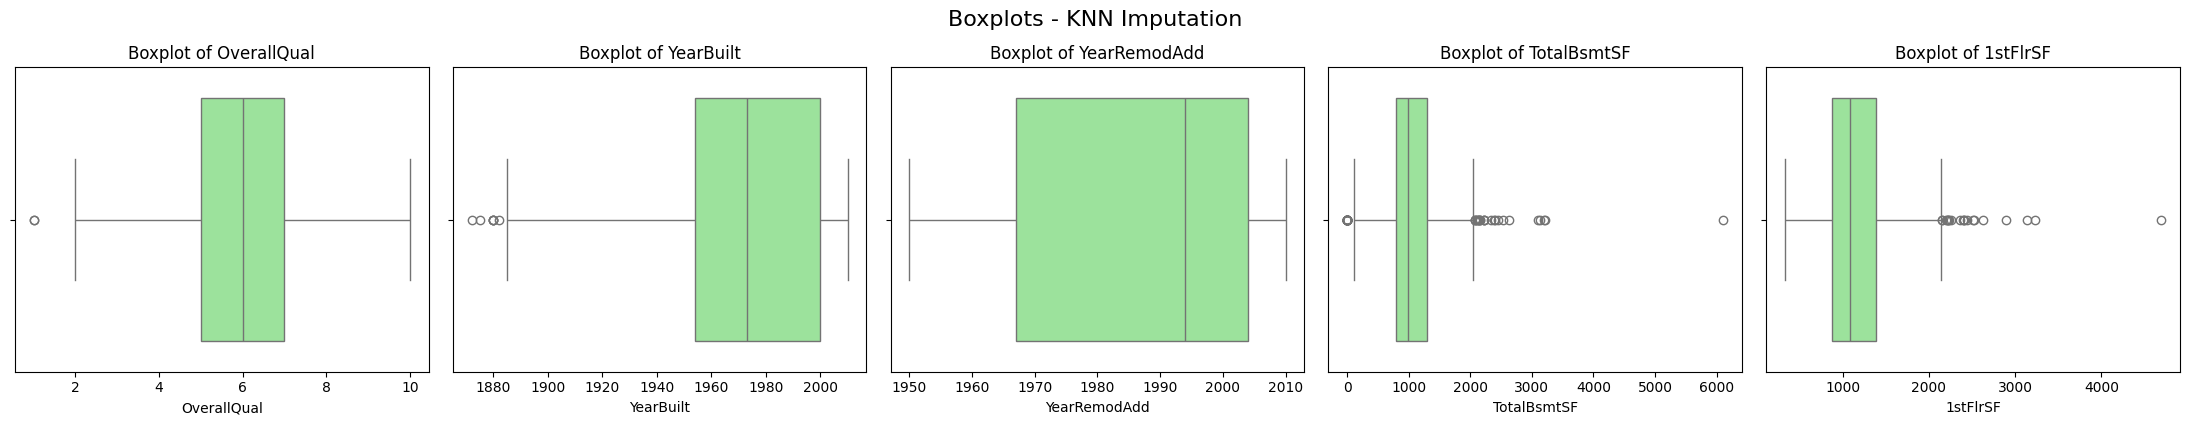

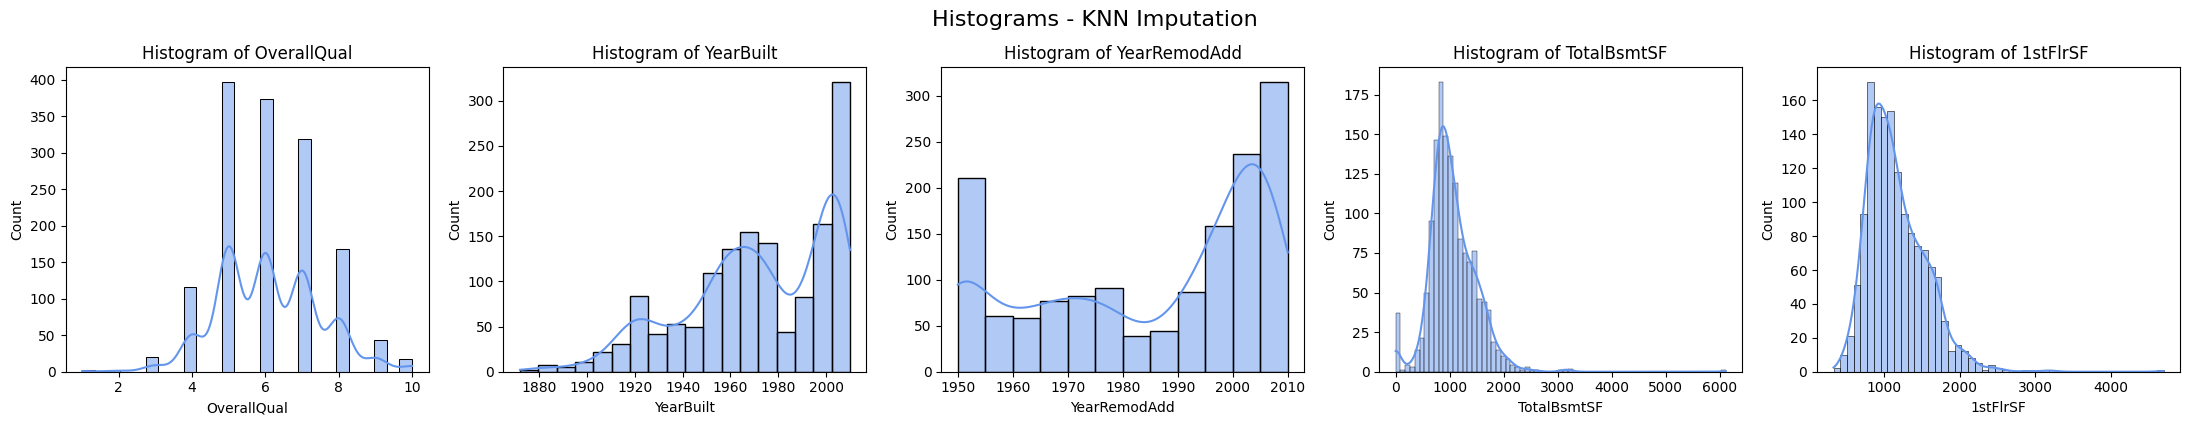

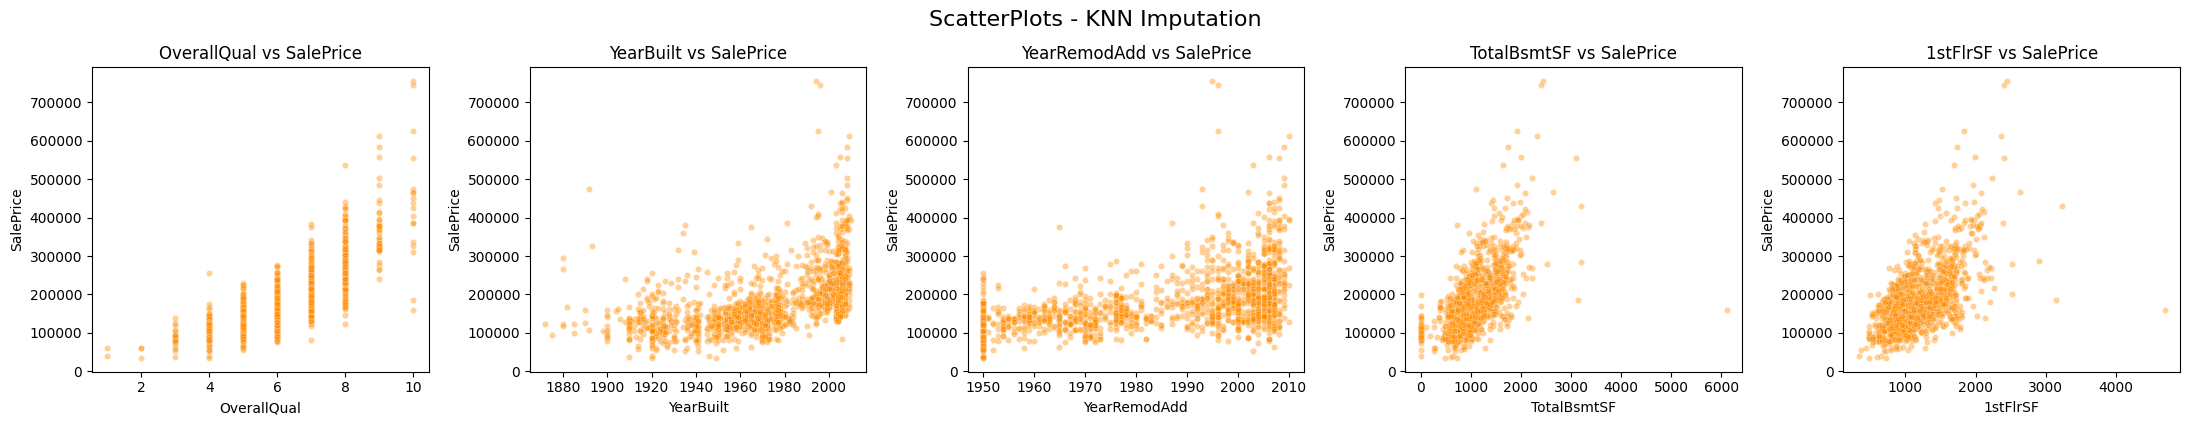

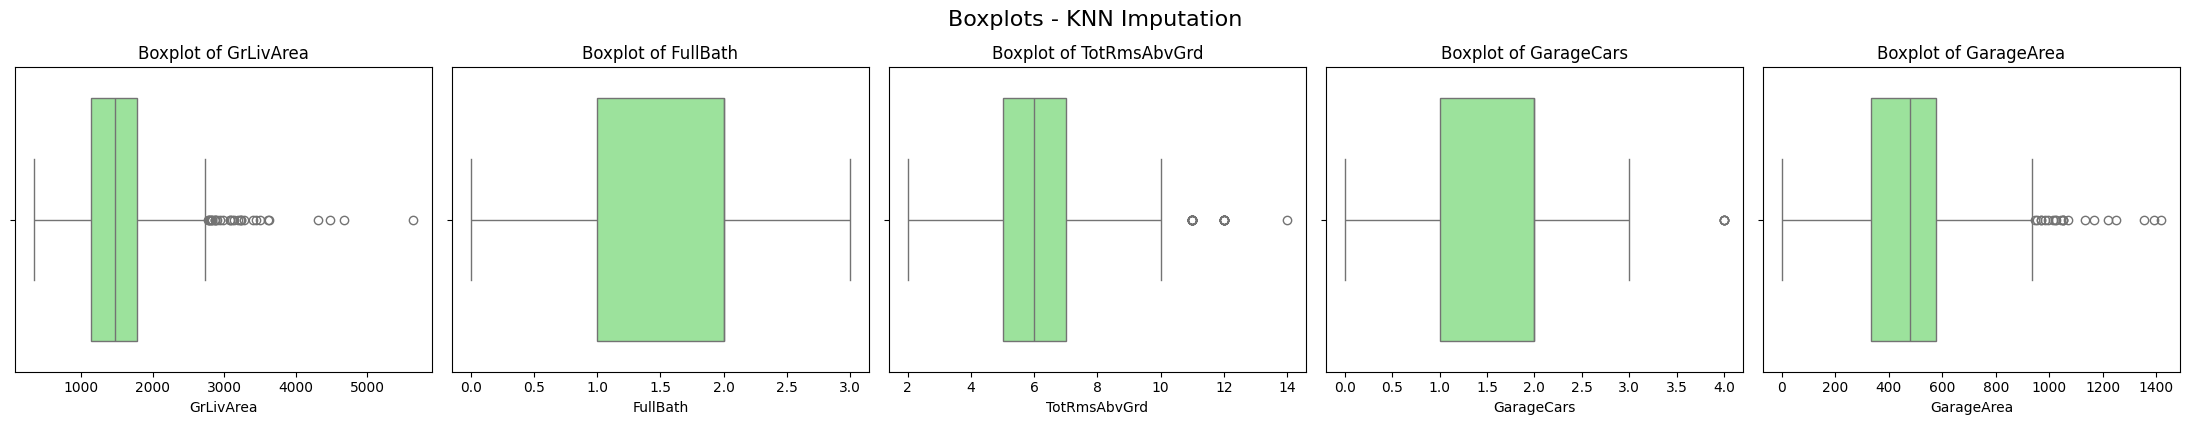

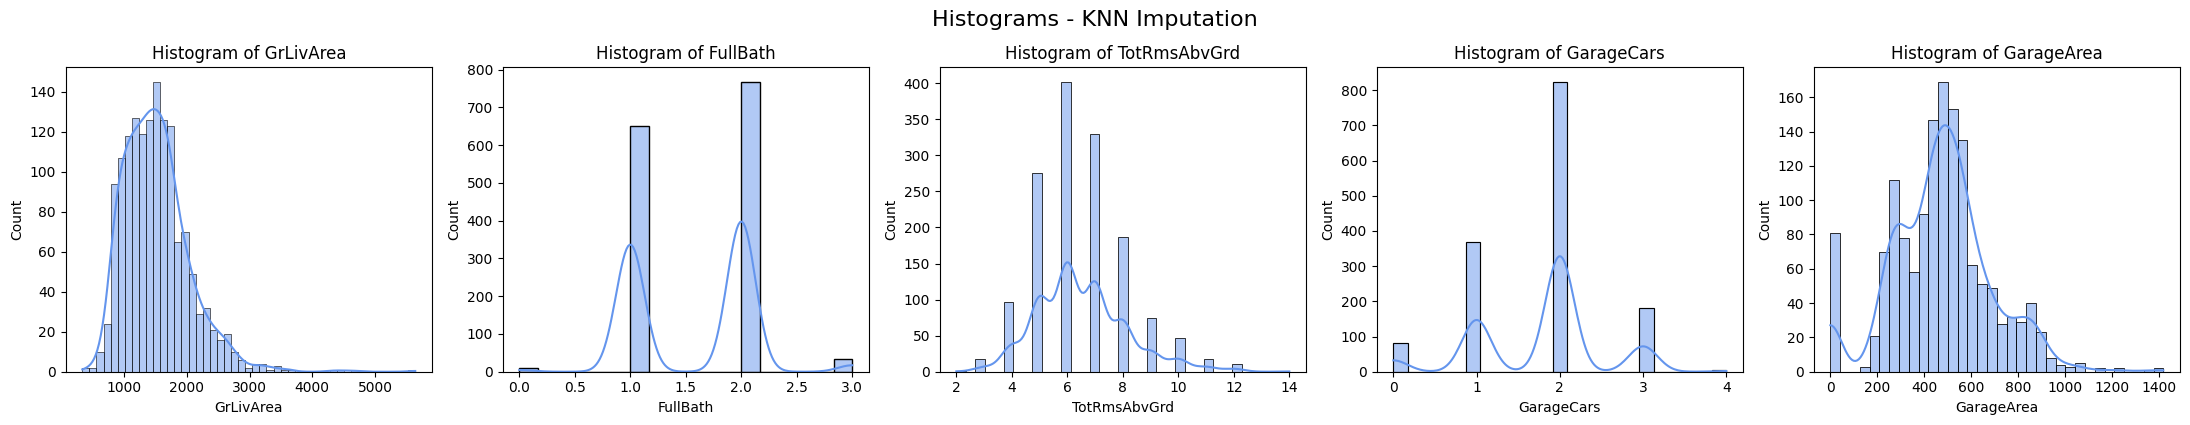

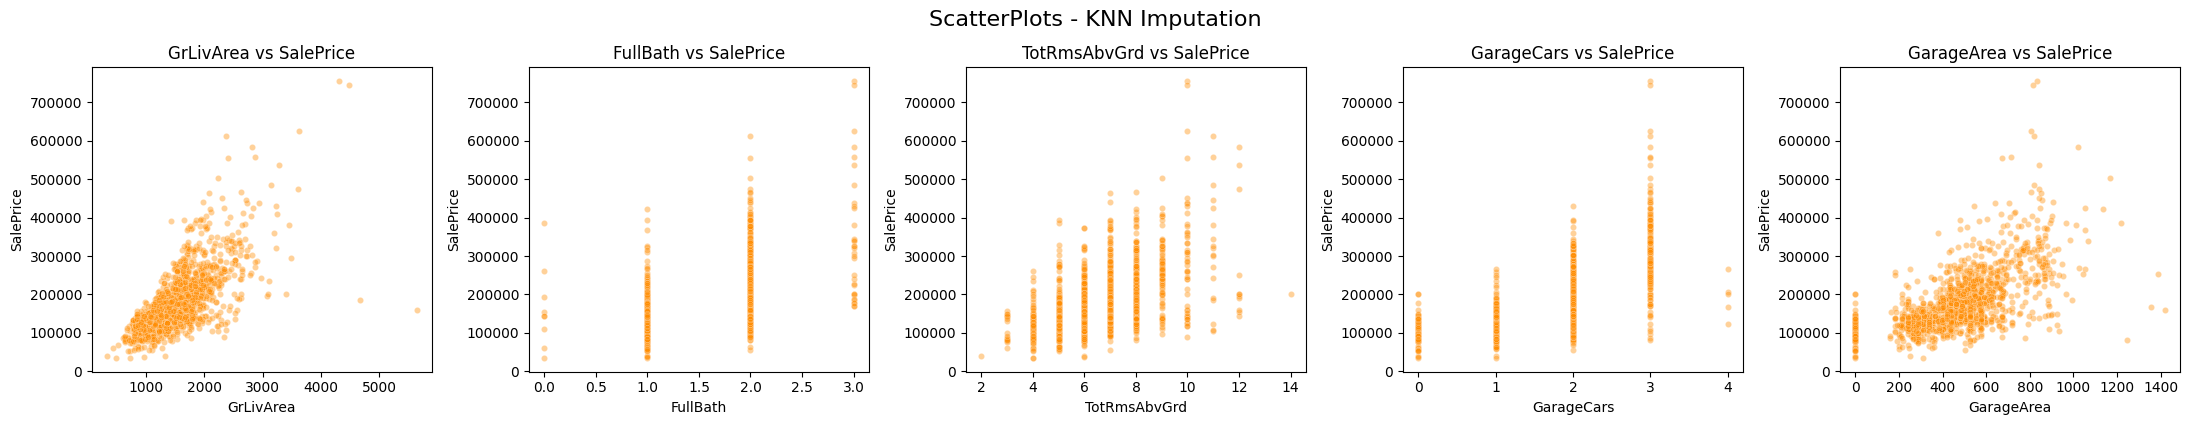

In [277]:
# 3 rows, 5 cols (boxplot, histogram, scatterplot)

features = ["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", 
            "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea"]


for df_name, df_to_plot in [("Simple Imputation", df_simple_imput), ("KNN Imputation", df_knn_imput)]:
    print(f"==== Gráficos para: {df_name} ====")
    
    for i in range(0, len(features), 5):
        subset = features[i:i+5]

        fig, axis = plt.subplots(1, 5, figsize=(22, 4))
        for j, feature in enumerate(subset):
            sns.boxplot(x=df_to_plot[feature], ax=axis[j], color='lightgreen')
            axis[j].set_title(f"Boxplot of {feature}")
        plt.tight_layout()
        plt.suptitle(f"Boxplots - {df_name}", fontsize=16, y=1.05)
        plt.show()

        fig, axis = plt.subplots(1, 5, figsize=(22, 4))
        for j, feature in enumerate(subset):
            sns.histplot(df_to_plot[feature], kde=True, ax=axis[j], color="cornflowerblue")
            axis[j].set_title(f"Histogram of {feature}")
        plt.tight_layout()
        plt.suptitle(f"Histograms - {df_name}", fontsize=16, y=1.05)
        plt.show()

        fig, axis = plt.subplots(1, 5, figsize=(22, 4))
        for j, feature in enumerate(subset):
            sns.scatterplot(x=df_to_plot[feature], y=df_to_plot["SalePrice"], ax=axis[j],
                            color='darkorange', alpha=0.4, s=20)
            axis[j].set_title(f"{feature} vs SalePrice")
        plt.tight_layout()
        plt.suptitle(f"ScatterPlots - {df_name}", fontsize=16, y=1.05)
        plt.show()


In [278]:
diff = (df_simple_imput[features] - df_knn_imput[features]).abs()
print(diff.sum().sort_values(ascending=False))

GrLivArea       1.364242e-12
GarageArea      2.842171e-13
TotalBsmtSF     1.136868e-13
OverallQual     0.000000e+00
YearBuilt       0.000000e+00
YearRemodAdd    0.000000e+00
1stFlrSF        0.000000e+00
FullBath        0.000000e+00
TotRmsAbvGrd    0.000000e+00
GarageCars      0.000000e+00
dtype: float64


## Analysing the graphs

### Why the Graphs Looked Nearly Identical for Simple Imputation and KNN Imputation

After generating visualizations **(boxplots, histograms, and scatter plots)** using both the `Simple Imputation` and `KNN Imputation` datasets, the resulting graphs appeared `almost identical`. This outcome can be explained by the following key factors:

#### 1. Minimal Differences Between Imputation Methods
A direct comparison of the imputed datasets showed that the absolute differences in the selected numerical features were either exactly zero or extremely close to zero (e.g., in the order of `1e-13` or less). This indicates that **both imputation methods** resulted in n**early the same values** for those variables.

#### 2. Low Amount of Missing Data
The variables selected for plotting likely had either **no missing values** or **very few**. When missing data is scarce, both the median (used in simple imputation) and the KNN algorithm tend to fill in those gaps with very similar estimates, especially in stable, well-distributed features.

#### 3. Strong Data Consistency
Many of the features used (e.g., `OverallQual`, `GarageCars`, `YearBuilt`) are categorical or ordinal with limited unique values. **These types of variables tend to be robust to small changes** introduced by imputation, which helps maintain consistent shapes in plots.

#### 4. No Practical Impact on Distributions
Since the **differences between the imputed values were numerically negligible**, the overall distributions, central tendencies (mean/median), and relationships with `SalePrice` remained virtually unchanged. As a result, the plots generated from both versions of the dataset were visually indistinguishable.

In summary, the similarity of the graphs is expected and validates that the imputation process preserved the integrity of the original data structure for the selected features.


## **Training & Validation**

### Linear Regression with Simple Imputation and KNN Imputation vs XGBoost

In [279]:
# --- Simple Imputation ---

X_s = df_simple_imput[features]
y_s = df_simple_imput["SalePrice"]

X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X_s, y_s, test_size=0.3, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)

y_pred_s = model_simple.predict(X_val_s)

mse_s = mean_squared_error(y_val_s, y_pred_s)
rsme_s = mse_s ** 0.5
r2_s = r2_score(y_val_s, y_pred_s)

# --- KNN Imputation ---

X_k = df_knn_imput[features]
y_k = df_knn_imput["SalePrice"]

X_train_k, X_val_k, y_train_k, y_val_k = train_test_split(X_k, y_k, test_size=0.3, random_state=42)

model_knn = LinearRegression()
model_knn.fit(X_train_k, y_train_k)

y_pred_k = model_simple.predict(X_val_k)

mse_k = mean_squared_error(y_val_k, y_pred_k)
rsme_k = mse_k ** 0.5
r2_k = r2_score(y_val_k, y_pred_k)

# --- XGBoost ---

X_xgb = df_knn_imput[features]
y_xgb = df_knn_imput["SalePrice"]

X_train_xgb, X_val_xgb, y_train_xgb, y_val_xgb = train_test_split(X_xgb, y_xgb, test_size=0.3, random_state=42)

model_xgb_train = xgb.XGBRegressor(objective="reg:squarederror", 
                             n_estimators=100, # number of trees
                             max_depth=4, # max depth of each tree
                             learning_rate=0.05, 
                             random_sate=42)

model_xgb_train.fit(X_train_xgb, y_train_xgb)

y_pred_xgb_train = model_xgb_train.predict(X_val_xgb)

mse_xgb = mean_squared_error(y_val_xgb, y_pred_xgb_train)
rsme_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_val_xgb, y_pred_xgb_train)

# --- Show Results ---

results = pd.DataFrame({ 
    "Type": ["Simple", "KNN", "XGBoost"],
    "RMSE": [rsme_s, rsme_k, rsme_xgb], 
    "R2 Score": [r2_s, r2_k, r2_xgb]
})

results

,Type,RMSE,R2 Score
0,Simple,37253.021768,0.801122
1,KNN,37253.021768,0.801122
2,XGBoost,27556.915483,0.891176


## 🧪 Model Evaluation Summary

- The model using **Simple Imputation** and **KNN Imputation** both achieved a **Root Mean Squared Error (RMSE)** of approximately **$37,253**, meaning the predicted house prices deviate from the actual prices by around that amount on average.
- The **R² score** of **0.80** suggests that the model explains **80.11%** of the variability in house prices, indicating a strong linear fit.
- Interestingly, **both imputation methods** led to **nearly identical performance**, which implies that the simpler approach (Simple Imputation) is adequate for this dataset.
- The **XGBoost model** achieved significantly better performance, with an RMSE of about **$30,748** and an R² score of **0.86**, indicating it explains **86.45%** of the variance — a notable improvement over the linear regression models.


## **Applying a model**

### Linear Regression with KNN Imputation vs XGBoost

In [280]:
# --- Testing KNN ---

X_train_knn = df_knn_imput[features] # features
y_train_knn = df_knn_imput["SalePrice"] # target

model_knn_test = LinearRegression()
model_knn_test.fit(X_train_knn, y_train_knn)

X_test_knn = df_knn_imput_test[features]
y_pred_knn = model_knn_test.predict(X_test_knn)

# --- Testing with XGBoost ---

X_train_xgb = df_simple_imput[features]
y_train_xgb = df_simple_imput["SalePrice"]

model_xgb = xgb.XGBRegressor(objective="reg:squarederror", 
                             n_estimators=100, # number of trees
                             max_depth=4, # max depth of each tree
                             learning_rate=0.05, 
                             random_sate=42)

model_xgb.fit(X_train_xgb, y_train_xgb)

X_test_xgb = df_simple_imput_test[features]
y_pred_xgb = model_xgb.predict(X_test_xgb)

predictions_df = pd.DataFrame({
    "Id": df_test["Id"],
    "Predicted SalePrice KNN": y_pred_knn,
    "Predicted SalePrice XGBoost": y_pred_xgb
})

predictions_df

,Id,Predicted SalePrice KNN,Predicted SalePrice XGBoost
0,1461,110135.921109,125155.914062
1,1462,159059.960195,144739.421875
2,1463,169683.677293,165583.343750
3,1464,188059.736835,179382.609375
4,1465,219781.967519,209556.859375
...,...,...,...
1454,2915,72702.982138,78698.664062
1455,2916,87428.982764,85154.453125
1456,2917,156695.015844,154342.546875
1457,2918,111786.599844,117539.757812


##  📈 Visualization: KNN vs XGBoost

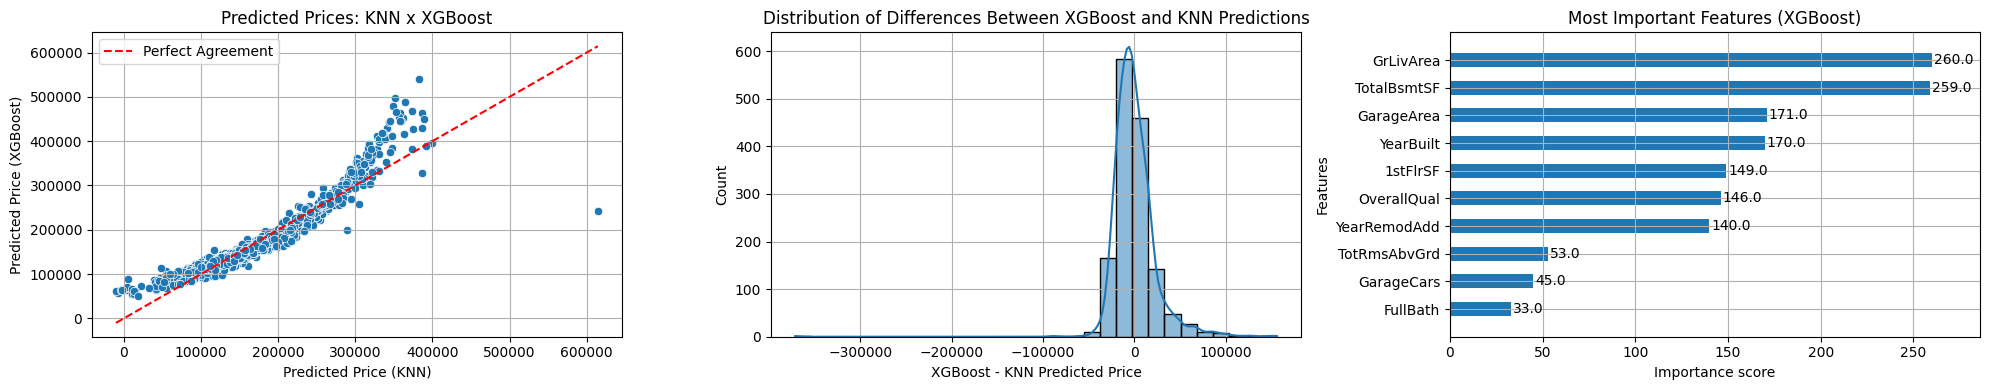

In [281]:
fig, axis = plt.subplots(1, 3, figsize=(20,4))

# --- Predicted Price: KNN x XGBoost ---

sns.scatterplot(x=predictions_df["Predicted SalePrice KNN"], y=predictions_df["Predicted SalePrice XGBoost"], ax=axis[0])
axis[0].plot([predictions_df.min().min(), predictions_df.max().max()],
            [predictions_df.min().min(), predictions_df.max().max()],
            'r--', label="Perfect Agreement")
axis[0].set_title("Predicted Prices: KNN x XGBoost")
axis[0].set_xlabel("Predicted Price (KNN)")
axis[0].set_ylabel("Predicted Price (XGBoost)")
axis[0].grid(True)
axis[0].legend()

# --- Price Difference KNN x XGBoost ---

predictions_df["Price Difference"] = predictions_df["Predicted SalePrice XGBoost"] - predictions_df["Predicted SalePrice KNN"]
sns.histplot(predictions_df["Price Difference"], bins=30, kde=True, ax=axis[1])
axis[1].set_title("Distribution of Differences Between XGBoost and KNN Predictions")
axis[1].set_xlabel("XGBoost - KNN Predicted Price")
axis[1].grid(True)

# --- Feature Importance ---
plot_importance(model_xgb, max_num_features=10, height=0.5, ax=axis[2])
axis[2].set_title("Most Important Features (XGBoost)")

plt.tight_layout()
plt.show()


## 📊 Comparative Analysis: KNN vs XGBoost

### 🔹 Plot 1: Predicted Prices (KNN vs XGBoost)
This scatter plot compares the house prices predicted by two models: **K-Nearest Neighbors (KNN)** and **XGBoost**.
- **X-axis**: Price predicted by the KNN model.
- **Y-axis**: Price predicted by the XGBoost model.
- Each point represents a house.
- The **red dashed line** represents the ideal case where both models predict the exact same value.

📌 **How to read it:**
- Points **close to the red line** → both models agree on the predicted price.
- Points **above the line** → XGBoost predicted a higher price than KNN.
- Points **below the line** → KNN predicted a higher price than XGBoost.

🔍 **Example:**
Imagine a house where KNN predicts \$180,000 and XGBoost predicts \$200,000 — this point would lie **above** the red line. That tells us XGBoost values that house more than KNN does.

---

### 🔹 Plot 2: Distribution of Differences (XGBoost - KNN)
This histogram displays the **distribution of the differences** in predicted prices between the two models, calculated as:

\[
\text{Difference} = \text{XGBoost Prediction} - \text{KNN Prediction}
\]

- **X-axis**: The difference in predicted price.
- **Y-axis**: Number of houses with that difference.
- The vertical dashed line at 0 represents **no difference**.

📌 **How to read it:**
- If the bars are **centered around 0**, both models make similar predictions.
- If the bars lean **to the left** (negative values), XGBoost tends to predict **lower prices** than KNN.
- If the bars lean **to the right**, XGBoost tends to predict **higher prices**.

🔍 **Example:**
In the graph, the tallest bar is slightly **left of 0**, meaning that **in most cases, XGBoost predicted a slightly lower price than KNN**. For instance, if a house had a KNN prediction of \$250,000 and XGBoost predicted \$240,000, the difference would be -10,000 — contributing to that negative peak.

---

### 🔹 Plot 3: Feature Importance (XGBoost)
This horizontal bar chart shows the **most important features** used by the XGBoost model to predict house prices.
- **X-axis**: Feature importance score (how often and how usefully the feature is used across the model's trees).
- **Y-axis**: Feature names.

📌 **How to read it:**
- The **longer the bar**, the more often the feature is used to split data in the decision trees, and the more impact it has on predictions.
- Importance is **not** how many houses the feature affects — it's how useful it is for making splits across the model.

🔍 **Example:**
In the chart, `GrLivArea` (above-ground living area) has a score of **260.0** — meaning it was used in **260 splits across all trees**. This makes it the most influential feature. Features like `TotalBsmtSF` (basement area), `GarageArea`, and `YearBuilt` also contribute significantly to predictions.

---

### 📝 Analysis

- **XGBoost predictions** are generally more refined and often closer to expected market values, which is consistent with the improved performance metrics (lower RMSE and higher R²).
- **KNN + Linear Regression predictions**, while reasonable, tend to have slightly larger deviations in certain price ranges.
- Despite small differences for each individual house, the overall performance gap reflects the more complex modeling capabilities of XGBoost, especially in capturing non-linear relationships.

This comparison reinforces the idea that **advanced models like XGBoost** can deliver **more accurate predictions** in datasets with complex feature interactions like housing prices.